In [24]:
# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")
# Load necessary libraries

# Numpy for numerical operations
import numpy as np

# Pandas for data manipulation
import pandas as pd
# OS for operating system dependent functionality
import os

# Librosa for audio processing
import librosa 

# Wave for reading and writing WAV files
import wave 

# Matplotlib for plotting
import matplotlib.pyplot as plt 

# Train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# MLPClassifier for building multi-layer perceptron models
from sklearn.neural_network import MLPClassifier

# Accuracy_score for calculating accuracy of the model
from sklearn.metrics import accuracy_score

# Keras for deep learning
import keras

# To_categorical for converting labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

# Sequential for creating sequential models
from keras.models import Sequential

# Various layers for building the model
from keras.layers import *

# RMSprop for optimization
from keras.optimizers import RMSprop

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")

In [25]:
def extract_mfcc(wav_file_name):
    # Load the audio file using librosa and get the signal (y) and sampling rate (sr)
    y, sr = librosa.load(wav_file_name)
    
    # Extract Mel-frequency cepstral coefficients (MFCCs) from the audio signal
    # librosa.feature.mfcc calculates the MFCCs of the audio signal
    # n_mfcc=40 specifies the number of MFCCs to extract (default is 20)
    # .T transposes the matrix so that the time dimension is along rows
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    
    # Take the mean along the axis 0, which represents the time axis
    # This results in a single vector of MFCCs summarizing the entire audio file
    return mfccs

In [26]:
# Function to extract MFCC (Mel-frequency cepstral coefficients) features from a WAV file
def extract_mfcc(wav_file_name):
    # Load the audio file using librosa
    y, sr = librosa.load(wav_file_name)
    
    # Compute MFCC features
    # n_mfcc: Number of MFCCs to return
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    
    return mfccs

# Lists to store the labels and data
radvess_speech_labels = []
ravdess_speech_data = []

# Directory containing the RAVDESS dataset
data_dir = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS'

# Walk through all files in the directory
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        # Extract label from the filename
        radvess_speech_labels.append(int(filename[7:8]) - 1)
        
        # Get the full path of the WAV file
        wav_file_name = os.path.join(dirname, filename)
        
        # Extract MFCC features from the WAV file and append to the data list
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

# Print message indicating that dataset loading is finished
print("Finish Loading the Dataset")

Finish Loading the Dataset


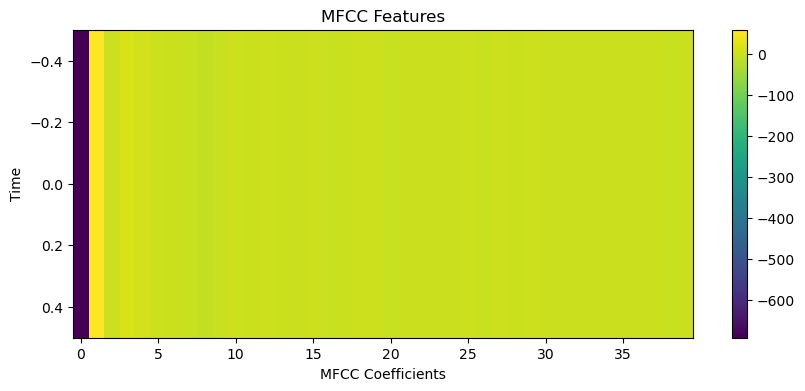

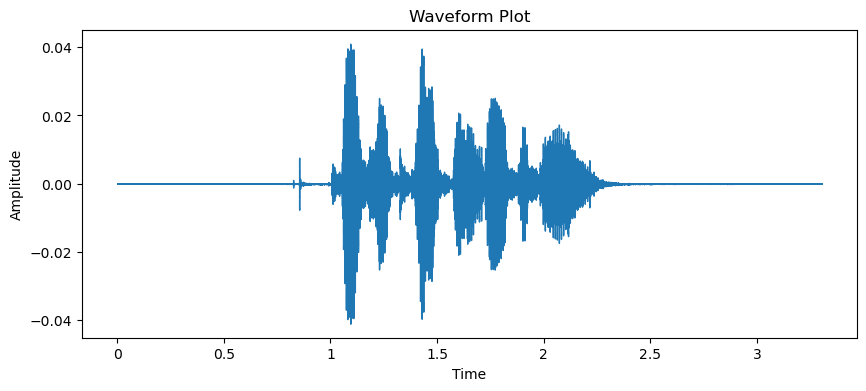

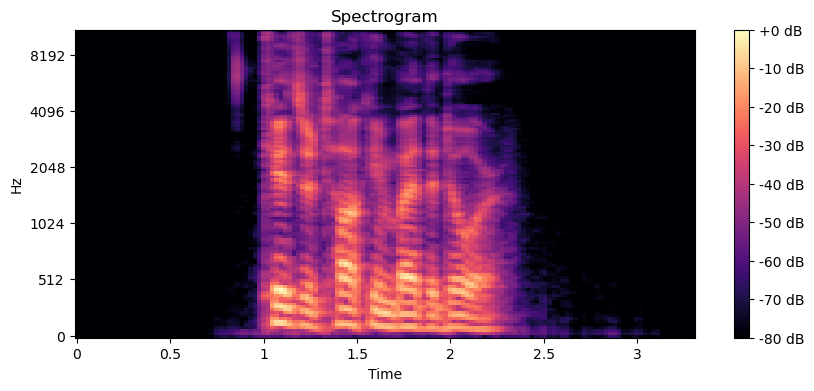

In [27]:
# Example index to visualize
example_index = 2

# Extract MFCCs and label for the example
example_mfccs = ravdess_speech_data[example_index]
example_label = radvess_speech_labels[example_index]

# Plot MFCC features
plt.figure(figsize=(10, 4))
plt.imshow(example_mfccs.reshape(1, -1), cmap='viridis', aspect='auto')
plt.title('MFCC Features')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Time')
plt.colorbar()
plt.show()

# Path to a sample WAV file for waveform and spectrogram visualization
wav_file_path = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-01-01-01.wav'

# Load the audio file
y, sr = librosa.load(wav_file_path)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Plot')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Plot spectrogram
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_db = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_db, y_axis='mel', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Play the audio
Audio(wav_file_path)

In [28]:
ravdess_speech_data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346550e-01,  1.2435786e+01,
         7.7339516e+00,  5.3075010e-01, -3.2166312e+00, -3.1593945e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529754e-01, -3.0370669e+00,
         1.9554465e+00, -3.7356682e+00,  4.3770033e-01,  7.8235650e-01,
        -4.0714283e+00, -1.8607764e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476109e+00, -5.0543833e-01, -2.3373916e+00, -4.5227795e+00,
        -1.6797225e+00, -8.1932092e-01, -4.8584828e+00,  2.5533605e-01,
        -2.1487043e+00,  1.4505522e-01, -2.0357563e+00, -2.1196339e+00,
        -2.7125890e+00, -1.8361270e+00, -3.2048051e+00, -1.5453684e+00,
        -1.0909370e+00, -1.7701062e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038305e+01,
         8.8188105e+00, -1.4658634e-01, -1.3733919e+00, -5.2931800e+00,
        -1.1623183e+01, -1.3482836e+00,  8.4371459e-01, -2.6412783e+00,
         1.0172499e+00, -3.2715344e+00, 

In [29]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions
#### make categorical labels
labels_categorical=to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical. shape

(2880, 8)

In [30]:
ravdess_speech_data_array.shape

(2880, 40)

In [31]:
# Splitting the data into training and testing sets
# np.array(ravdess_speech_data_array): Input features (MFCC data) in the form of a NumPy array
# labels_categorical: Target labels encoded as categorical variables
# test_size=0.20: Specifies that 20% of the data will be used for testing, while 80% will be used for training
# random_state=9: A random seed is set to 9 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20, random_state=9)

In [32]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int (number_of_samples * 0.1)
test_samples = int (number_of_samples * 0.1)

In [33]:
from keras.models import Sequential  # Importing the Sequential model from Keras
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten  # Importing necessary layers from Keras

In [34]:
# Import necessary layers from Keras
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Activation, Flatten

# Reshape data for CNN-LSTM hybrid model
# Reshaping the input data to fit the CNN-LSTM hybrid model architecture
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Define the CNN-LSTM hybrid model
def create_model_CNN_LSTM():
    model = Sequential()  # Creating a Sequential model
    # Adding a 1D convolutional layer
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], 1)))
    # Adding a 1D max pooling layer
    model.add(MaxPooling1D(pool_size=2))
    # Adding an LSTM layer
    model.add(LSTM(128, return_sequences=False))
    # Adding a dense layer
    model.add(Dense(128))
    # Adding dropout regularization to prevent overfitting
    model.add(Dropout(0.4))
    # Adding activation function
    model.add(Activation('relu'))
    # Adding another dense layer
    model.add(Dense(64))
    # Adding dropout regularization
    model.add(Dropout(0.4))
    # Adding activation function
    model.add(Activation('relu'))
    # Adding the output layer with softmax activation for multi-class classification
    model.add(Dense(8))
    model.add(Activation('softmax'))
    # Compiling the model, specifying loss function, optimizer, and evaluation metric
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the CNN-LSTM hybrid model
cnn_lstm_model = create_model_CNN_LSTM()  # Creating the CNN-LSTM model
# Training the model using the training data and validating it using the testing data
history = cnn_lstm_model.fit(x_train_reshaped, y_train, epochs=150, batch_size=30, validation_data=(x_test_reshaped, y_test))

Epoch 1/150
77/77 [==============================] - 11s 70ms/step - loss: 2.0663 - accuracy: 0.1332 - val_loss: 2.0175 - val_accuracy: 0.1823
Epoch 2/150
77/77 [==============================] - 1s 19ms/step - loss: 1.9888 - accuracy: 0.2079 - val_loss: 1.8781 - val_accuracy: 0.2951
Epoch 3/150
77/77 [==============================] - 2s 23ms/step - loss: 1.9053 - accuracy: 0.2609 - val_loss: 1.8384 - val_accuracy: 0.3056
Epoch 4/150
77/77 [==============================] - 2s 24ms/step - loss: 1.8380 - accuracy: 0.2921 - val_loss: 1.7337 - val_accuracy: 0.3628
Epoch 5/150
77/77 [==============================] - 2s 23ms/step - loss: 1.7892 - accuracy: 0.3212 - val_loss: 1.7183 - val_accuracy: 0.3611
Epoch 6/150
77/77 [==============================] - 2s 24ms/step - loss: 1.7251 - accuracy: 0.3411 - val_loss: 1.6391 - val_accuracy: 0.3854
Epoch 7/150
77/77 [==============================] - 2s 24ms/step - loss: 1.7046 - accuracy: 0.3668 - val_loss: 1.6781 - val_accuracy: 0.3681
Epoch

77/77 [==============================] - 2s 25ms/step - loss: 0.0450 - accuracy: 0.9878 - val_loss: 0.7972 - val_accuracy: 0.8906
Epoch 59/150
77/77 [==============================] - 2s 30ms/step - loss: 0.0637 - accuracy: 0.9831 - val_loss: 0.7793 - val_accuracy: 0.8750
Epoch 60/150
77/77 [==============================] - 2s 29ms/step - loss: 0.0950 - accuracy: 0.9688 - val_loss: 0.8880 - val_accuracy: 0.8750
Epoch 61/150
77/77 [==============================] - 2s 23ms/step - loss: 0.1244 - accuracy: 0.9696 - val_loss: 0.8064 - val_accuracy: 0.8819
Epoch 62/150
77/77 [==============================] - 1s 11ms/step - loss: 0.0973 - accuracy: 0.9748 - val_loss: 1.0077 - val_accuracy: 0.8420
Epoch 63/150
77/77 [==============================] - 2s 22ms/step - loss: 0.1012 - accuracy: 0.9701 - val_loss: 0.8641 - val_accuracy: 0.8628
Epoch 64/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0476 - accuracy: 0.9870 - val_loss: 0.9805 - val_accuracy: 0.8733
Epoch 65/150

77/77 [==============================] - 2s 24ms/step - loss: 0.0365 - accuracy: 0.9900 - val_loss: 1.0352 - val_accuracy: 0.8576
Epoch 116/150
77/77 [==============================] - 2s 23ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.9791 - val_accuracy: 0.8785
Epoch 117/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0250 - accuracy: 0.9948 - val_loss: 0.9733 - val_accuracy: 0.8872
Epoch 118/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0344 - accuracy: 0.9909 - val_loss: 0.9408 - val_accuracy: 0.8802
Epoch 119/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.9453 - val_accuracy: 0.8993
Epoch 120/150
77/77 [==============================] - 2s 24ms/step - loss: 0.0767 - accuracy: 0.9813 - val_loss: 0.8472 - val_accuracy: 0.8976
Epoch 121/150
77/77 [==============================] - 2s 23ms/step - loss: 0.0673 - accuracy: 0.9818 - val_loss: 0.8918 - val_accuracy: 0.8802
Epoch 

In [35]:
# Evaluate the model on the test set
loss, accuracy = cnn_lstm_model.evaluate(x_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

18/18 [==============================] - 0s 12ms/step - loss: 0.9868 - accuracy: 0.8924
Test Accuracy: 89.24%


In [36]:
cnn_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 36, 64)            384       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 18, 64)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                      

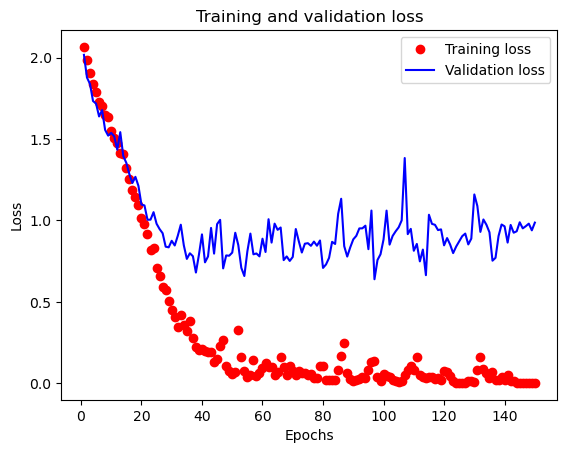

In [37]:
### loss plots using CNN-LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

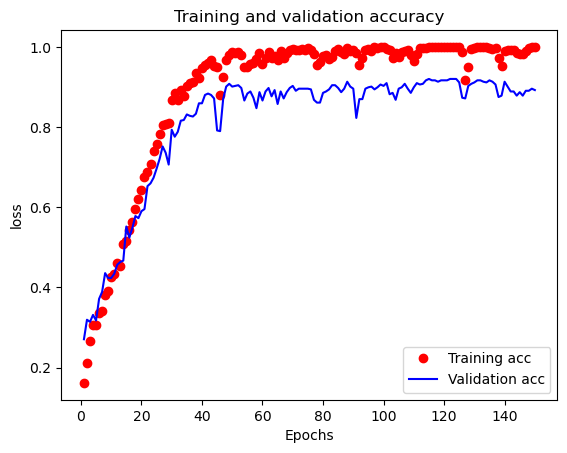

In [15]:
### accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt. ylabel('loss')
plt.legend()
plt. show()

In [38]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad' , 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point, newshape=(1,40,1))
  predictions=cnn_lstm_model.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [39]:
# Save the model architecture as JSON
model_json = cnn_lstm_model.to_json()
with open("cnn_lstm_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
cnn_lstm_model.save_weights("cnn_lstm_model_weights.h5")

In [40]:
# Assuming the file path is available
wav_file_path = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-02-02-01.wav'  # Update with the actual path
Audio(wav_file_path)

In [41]:
predict(r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-02-02-01.wav')

1/1 [==============================] - 1s 1s/step
neutral


1/1 [==============================] - 0s 66ms/step


In [42]:
import tkinter as tk  # Importing the tkinter library for GUI
from tkinter import filedialog, messagebox  # Importing specific modules for file dialog and message box
from IPython.display import Audio  # Importing Audio module from IPython.display for audio playback
import numpy as np  # Importing numpy for numerical operations
import librosa  # Importing librosa for audio processing

# Define function to extract MFCC features from audio file
def extract_mfcc(wav_file_name):
    # Load audio file using librosa
    y, sr = librosa.load(wav_file_name)
    # Extract MFCC features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

# Define function to predict emotion from audio file
def predict_emotion(wav_file_path):
    # Extract MFCC features from the audio file
    test_point = extract_mfcc(wav_file_path)
    # Reshape the MFCC features
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    # Predict emotion using the CNN-LSTM model
    predictions = cnn_lstm_model.predict(test_point)
    # Get the index of the predicted emotion
    emotion_index = np.argmax(predictions[0]) + 1
    return emotions[emotion_index]

# Function to handle button click event for selecting audio file
def select_file():
    # Open file dialog to select audio file
    file_path = filedialog.askopenfilename(title="Select Audio File", filetypes=(("WAV files", "*.wav"), ("All files", "*.*")))
    # Update the text entry widget with the selected file path
    if file_path:
        txt_selected_file.delete(0, tk.END)
        txt_selected_file.insert(0, file_path)

# Function to handle button click event for predicting emotion
def predict_emotion_gui():
    # Get the selected file path
    file_path = txt_selected_file.get()
    if file_path:
        try:
            # Predict emotion from the selected audio file
            predicted_emotion = predict_emotion(file_path)
            # Show predicted emotion in a message box
            messagebox.showinfo("Predicted Emotion", f"The predicted emotion is: {predicted_emotion}")
        except Exception as e:
            # Show error message if an exception occurs
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    else:
        # Show error message if no file is selected
        messagebox.showerror("Error", "Please select an audio file first.")

# Function to play the selected audio file
def play_audio():
    # Get the selected file path
    file_path = txt_selected_file.get()
    if file_path:
        try:
            # Play the selected audio file
            audio = Audio(file_path)
            display(audio)
        except Exception as e:
            # Show error message if an exception occurs while playing audio
            messagebox.showerror("Error", f"An error occurred while playing the audio: {str(e)}")
    else:
        # Show error message if no file is selected
        messagebox.showerror("Error", "Please select an audio file first.")

# Create the main GUI window
root = tk.Tk()
root.title("Emotion Recognition from Audio")  # Set title of the window
root.geometry("600x250")  # Set window size

# Create widgets for selecting, playing, and predicting emotion from audio file
lbl_select_file = tk.Label(root, text="Select Audio File:", font=("Helvetica", 12))
lbl_select_file.grid(row=0, column=0, padx=10, pady=5)

txt_selected_file = tk.Entry(root, width=40, font=("Helvetica", 10))
txt_selected_file.grid(row=0, column=1, padx=10, pady=5, columnspan=2)

btn_browse = tk.Button(root, text="Browse", command=select_file, bg="#4CAF50", fg="white", font=("Helvetica", 10))
btn_browse.grid(row=0, column=3, padx=5, pady=5)

btn_play_audio = tk.Button(root, text="Play Audio", command=play_audio, bg="#FFD700", fg="black", font=("Helvetica", 12))
btn_play_audio.grid(row=1, column=0, padx=10, pady=10)

btn_predict = tk.Button(root, text="Predict Emotion", command=predict_emotion_gui, bg="#008CBA", fg="white", font=("Helvetica", 12))
btn_predict.grid(row=1, column=1, columnspan=3, padx=10, pady=10)

# Run the GUI application
root.mainloop()

1/1 [==============================] - 0s 25ms/step
